<a href="https://colab.research.google.com/github/garvinfrank/Billboard-hot100-predictor-spotify-dataset/blob/main/billboardhot100_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 0: Import basic libraries
Import all required libraries and corresponding modules.

In [ ]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Load the Dataset
Load the data into a Pandas DataFrame for analysis.


In [ ]:
all_file_path = glob.glob("/content/dataset-of-*0s.csv")
list_of_dataframes = []
for file_path in all_file_path:
  df = pd.read_csv(file_path)
  list_of_dataframes.append(df)
dataset = pd.concat(list_of_dataframes, ignore_index = True)
dataset.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [ ]:
dataset.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [ ]:
dataset.shape

(41106, 19)

## Step 2: Data Cleaning
Handle missing values, remove duplicates, and filter out unwanted columns to prepare the dataset for analysis.


In [ ]:
dataset.isnull().sum() # checking for any missing values

,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


## Step 3: Feature Engineering
Create new features and prepare the dataset for model training. Drop or encode features as needed.


In [ ]:
clean_dataset = dataset.drop(columns = ['track', 'artist', 'uri'])

In [ ]:
clean_dataset['duration_minutes'] = clean_dataset['duration_ms'] / 60000
clean_dataset.drop(columns = ['duration_ms'], inplace = True)

In [ ]:
clean_dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,chorus_hit,sections,target,duration_minutes
0,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,4,68.46530,7,0,2.698217
1,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,4,57.71583,11,1,3.700000
2,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,4,30.34574,17,0,7.415117
3,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,3,50.97022,7,0,2.631550
4,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,4,33.62053,7,1,2.704883


In [ ]:
clean_dataset.shape

(41106, 16)

## Step 4: Exploratory Data Analysis (EDA)
Analyze feature distributions and visualize relationships within the data.


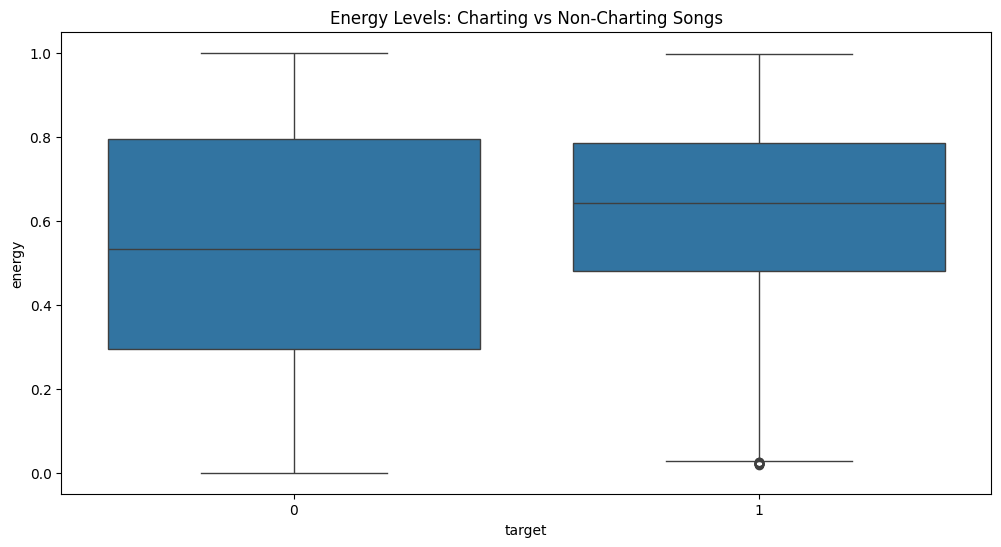

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="energy", data=clean_dataset)
plt.title("Energy Levels: Charting vs Non-Charting Songs")
plt.show()

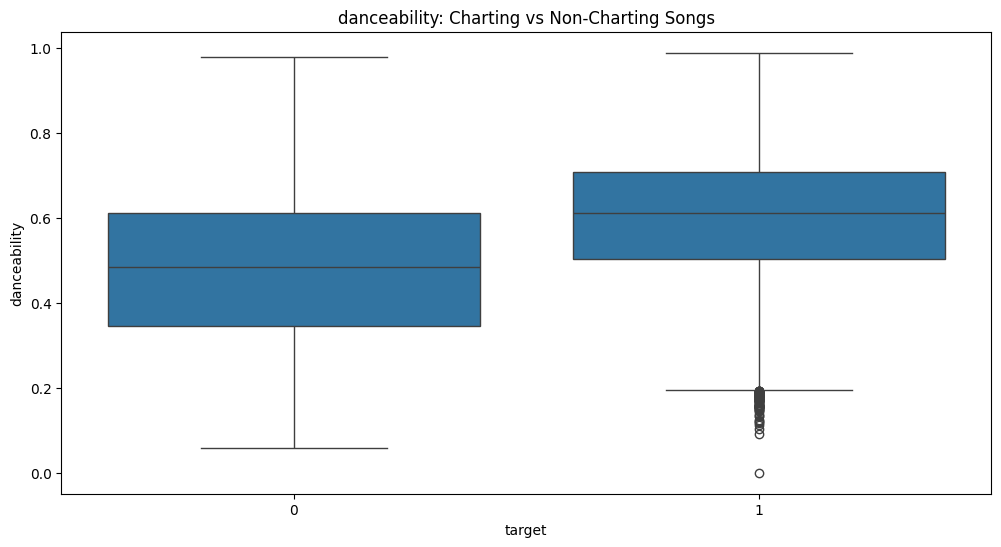

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="danceability", data=clean_dataset)
plt.title("danceability: Charting vs Non-Charting Songs")
plt.show()

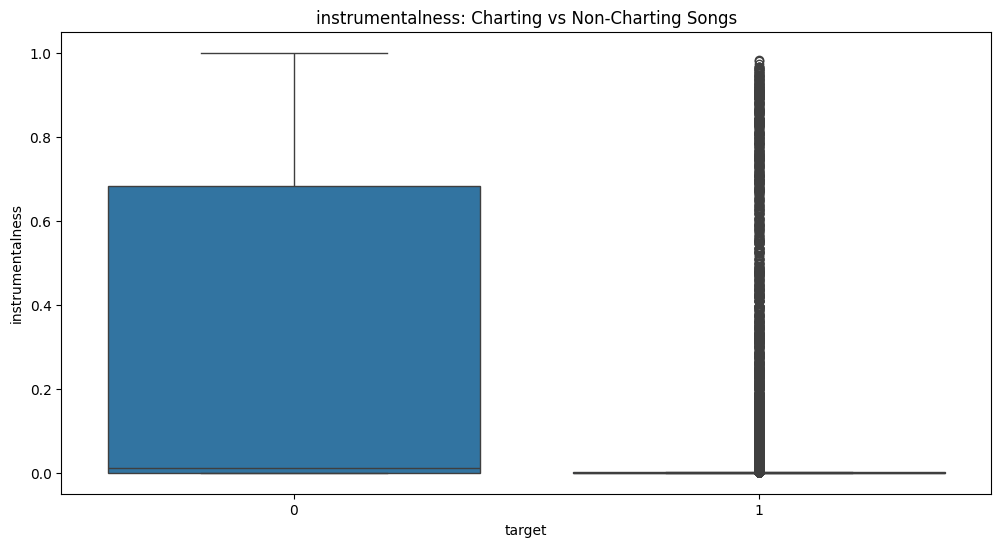

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="instrumentalness", data=clean_dataset)
plt.title("instrumentalness: Charting vs Non-Charting Songs")
plt.show()

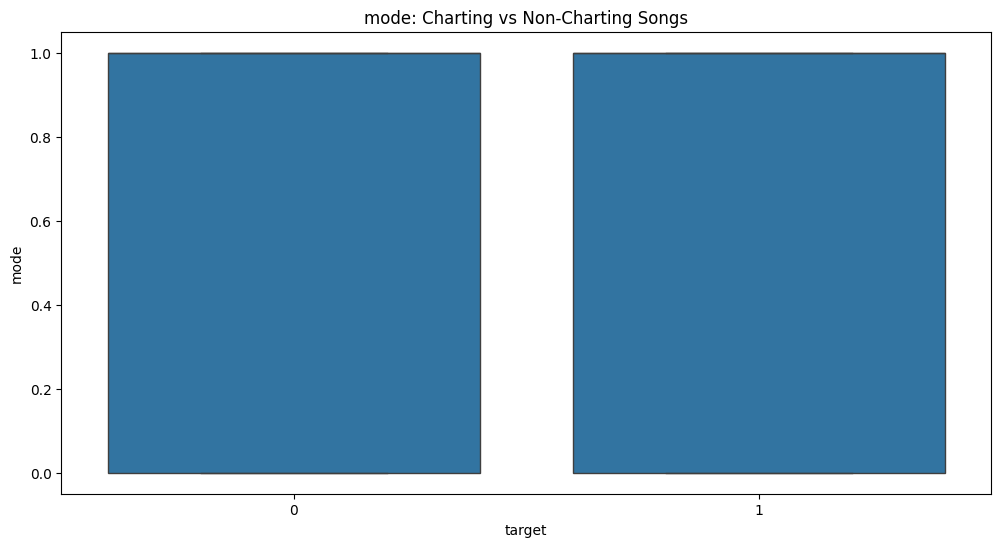

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="target", y="mode", data=clean_dataset)
plt.title("mode: Charting vs Non-Charting Songs")
plt.show()

## Step 5: Train-Test Split
Split the data into training and testing sets for model training and evaluation.


In [ ]:
from sklearn.model_selection import train_test_split #train-test split

X = clean_dataset.drop(columns = ['target'])
y = clean_dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

## Step 6: Feature Scaling
Scale features to ensure consistent value ranges, which helps improve model performance.


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #initialize the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 7: Model Training
Initialize and train multiple models on the training data to compare performance.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
svc_clf = SVC(random_state=42)

# Train models on the scaled training data
log_reg.fit(X_train_scaled, y_train)
rf_clf.fit(X_train_scaled, y_train)
svc_clf.fit(X_train_scaled, y_train)

# Predictions on test data
log_reg_pred = log_reg.predict(X_test_scaled)
rf_clf_pred = rf_clf.predict(X_test_scaled)
svc_clf_pred = svc_clf.predict(X_test_scaled)

# Evaluate accuracy of each model
log_reg_acc = accuracy_score(y_test, log_reg_pred)
rf_clf_acc = accuracy_score(y_test, rf_clf_pred)
svc_clf_acc = accuracy_score(y_test, svc_clf_pred)

log_reg_acc, rf_clf_acc, svc_clf_acc


(0.7258352254297762, 0.7872202400259487, 0.7742458644177749)

## Step 8: Hyperparameter Tuning
Optimize hyperparameters of the best-performing model using Randomized Search.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Randomized parameter search
random_search_rf = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid_rf,
    n_iter=10,  # Number of random combinations to try
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search_rf.fit(X_train_scaled, y_train)

# Best parameters and score
best_params_rf_random = random_search_rf.best_params_
best_score_rf_random = random_search_rf.best_score_

best_params_rf_random, best_score_rf_random


Fitting 5 folds for each of 10 candidates, totalling 50 fits


({'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 30},
 0.7859525274149182)

## Step 9: Final Model Evaluation
Evaluate the optimized model on the test set to determine its predictive accuracy.


In [ ]:
# Train Random Forest with the best parameters
best_rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
best_rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set and calculate accuracy
rf_test_pred = best_rf_clf.predict(X_test_scaled)
rf_test_accuracy = accuracy_score(y_test, rf_test_pred)

rf_test_accuracy


0.7878689588063574